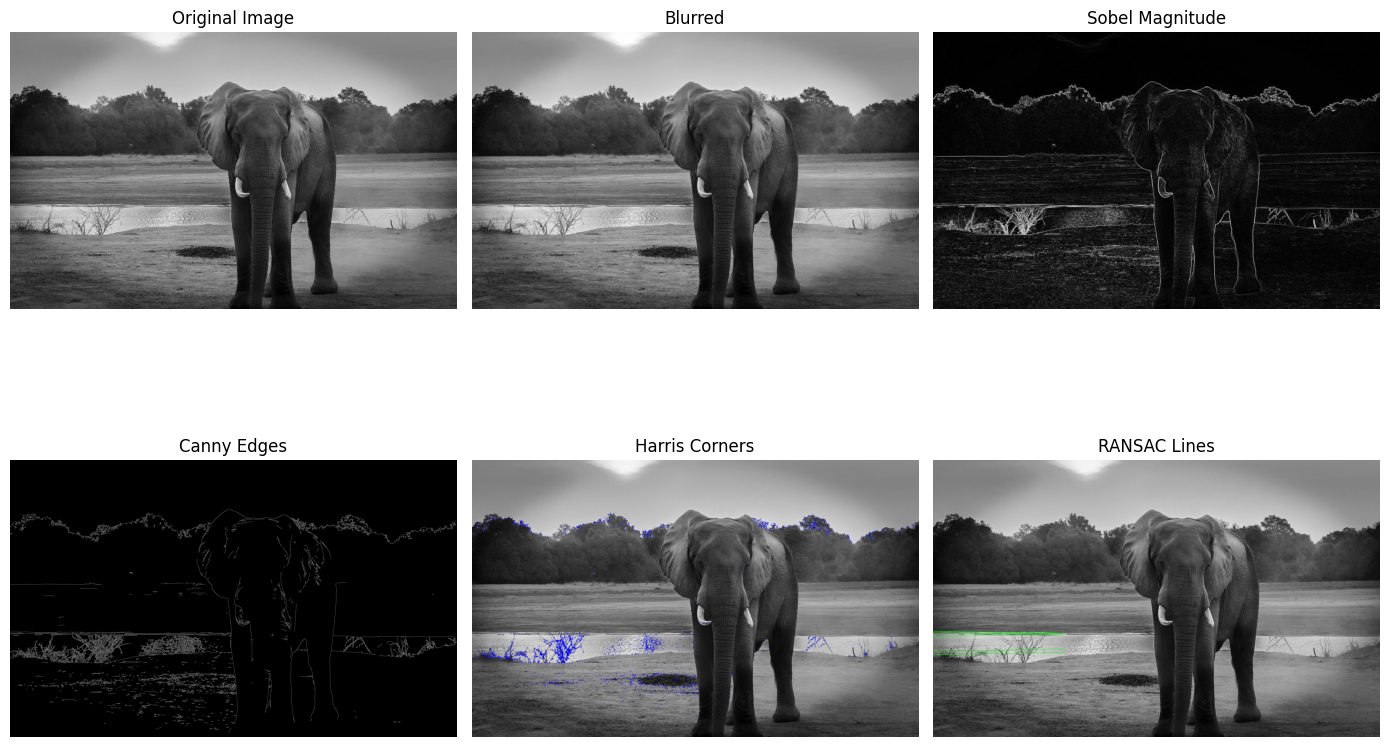

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_PATH = "/content/CV assignment_code.jpg"
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img, (5, 5), 1.2)

# Sobel
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = cv2.convertScaleAbs(cv2.magnitude(sobel_x, sobel_y))

# Canny
edges = cv2.Canny(blur, 50, 150)

# Harris
harris = cv2.cornerHarris(np.float32(blur), 2, 3, 0.04)
harris = cv2.dilate(harris, None)
harris_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
harris_vis[harris > 0.01 * harris.max()] = [0, 0, 255]

#RANSAC Line Detection
ransac_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

if lines is not None:
    for i in range(min(5, len(lines))):
        rho, theta = lines[i][0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        cv2.line(ransac_vis, pt1, pt2, (0, 255, 0), 2)

# Display Results
fig_titles = [
    "Original Image", "Blurred",
    "Sobel Magnitude", "Canny Edges",
    "Harris Corners", "RANSAC Lines"
]

fig_images = [
    img, blur,
    sobel_mag, edges,
    harris_vis, ransac_vis
]

plt.figure(figsize=(14, 10))
for i in range(len(fig_images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(fig_images[i], cmap="gray" if i != 4 and i != 5 else None)
    plt.title(fig_titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


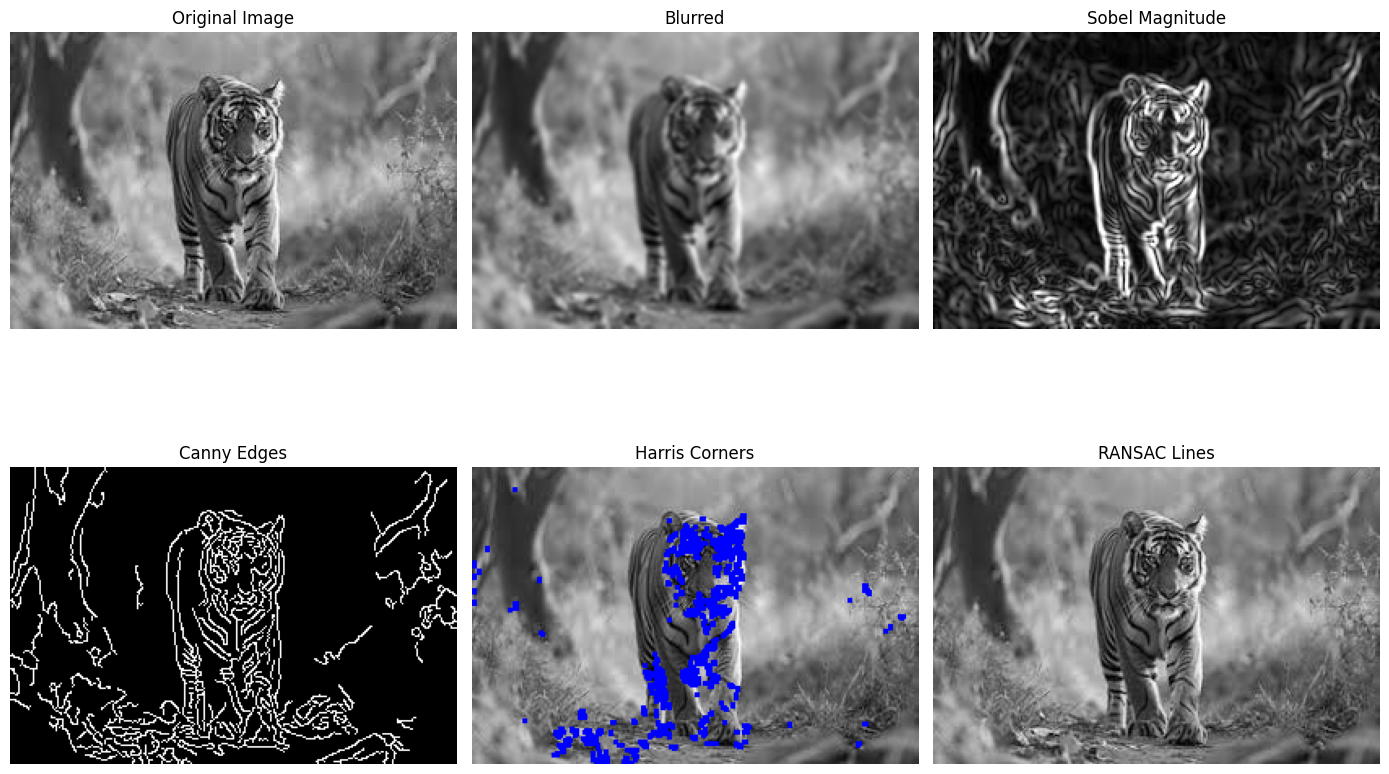

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_PATH = "/content/cv_assign_2.jpg"
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img, (5, 5), 1.2)

# Sobel
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = cv2.convertScaleAbs(cv2.magnitude(sobel_x, sobel_y))

# Canny
edges = cv2.Canny(blur, 50, 150)

# Harris
harris = cv2.cornerHarris(np.float32(blur), 2, 3, 0.04)
harris = cv2.dilate(harris, None)
harris_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
harris_vis[harris > 0.02 * harris.max()] = [0, 0, 255]

#RANSAC Line Detection
ransac_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

if lines is not None:
    for i in range(min(5, len(lines))):
        rho, theta = lines[i][0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        cv2.line(ransac_vis, pt1, pt2, (0, 255, 0), 2)

# Display Results
fig_titles = [
    "Original Image", "Blurred",
    "Sobel Magnitude", "Canny Edges",
    "Harris Corners", "RANSAC Lines"
]

fig_images = [
    img, blur,
    sobel_mag, edges,
    harris_vis, ransac_vis
]

plt.figure(figsize=(14, 10))
for i in range(len(fig_images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(fig_images[i], cmap="gray" if i != 4 and i != 5 else None)
    plt.title(fig_titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


Best Features: Corners (Harris)


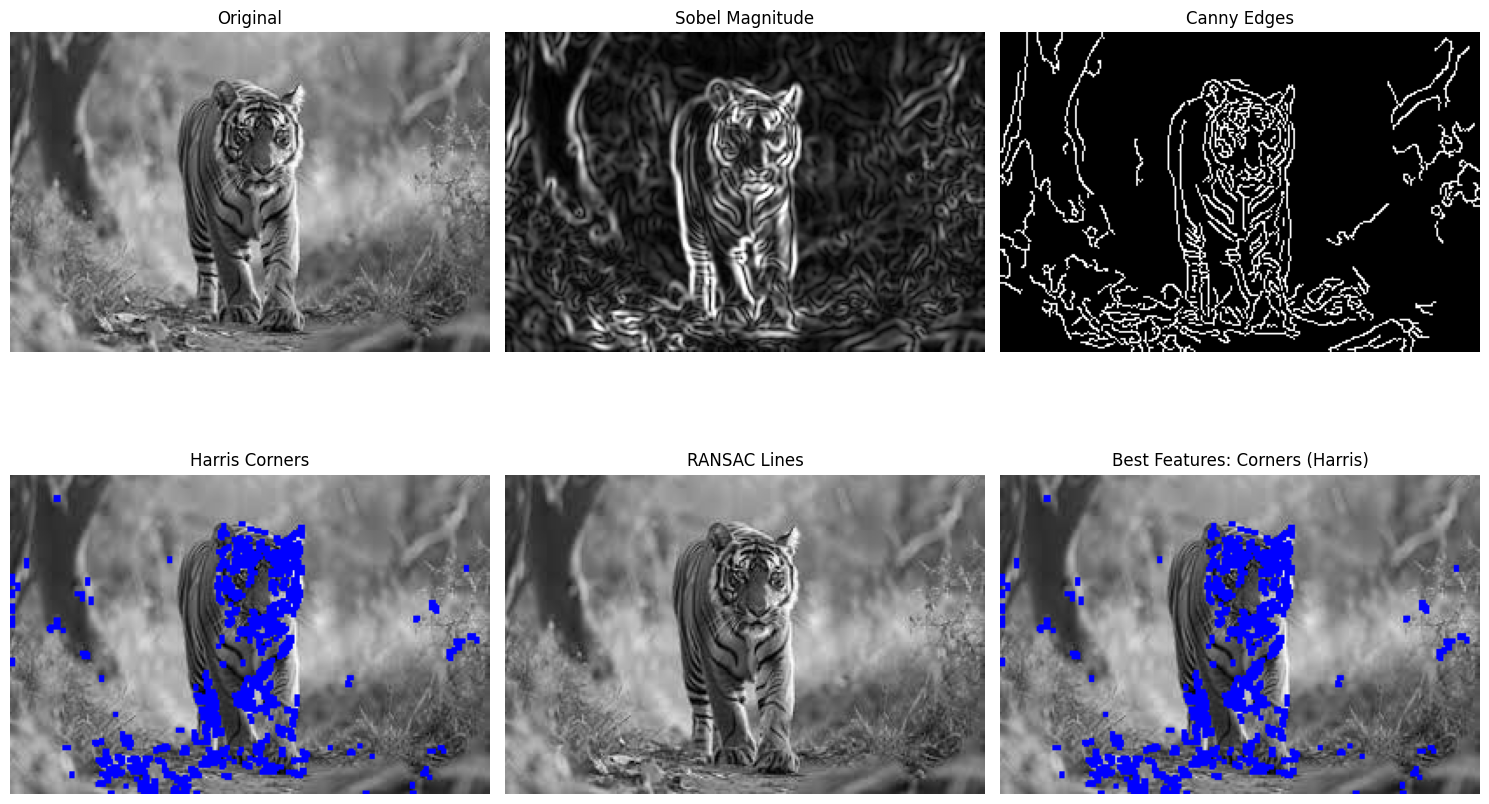

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_PATH = "/content/cv_assign_2.jpg"
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

# Step 1: Preprocessing
blur = cv2.GaussianBlur(img, (5, 5), 1.2)

# Step 2: Sobel + Canny
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = cv2.convertScaleAbs(cv2.magnitude(sobel_x, sobel_y))
edges = cv2.Canny(blur, 50, 150)

# Step 3: Harris Corners
harris = cv2.cornerHarris(np.float32(blur), 2, 3, 0.04)
harris = cv2.dilate(harris, None)
corners_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
corners_vis[harris > 0.01 * harris.max()] = [0, 0, 255]

# Step 4:(line detection check)
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)
line_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

num_lines = 0
if lines is not None:
    for i in range(min(5, len(lines))):
        rho, theta = lines[i][0]
        a = np.cos(theta); b = np.sin(theta)
        x0 = a * rho; y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        cv2.line(line_vis, pt1, pt2, (0, 255, 0), 2)
    num_lines = len(lines)

# Step 5: Decision for best feature set
if num_lines > 0:
    best_output = line_vis
    result_type = "Best Features :  Straight Lines (RANSAC)"
else:
    best_output = corners_vis
    result_type = "Best Features: Corners (Harris)"

print(result_type)

# Display
titles = [
    "Original", "Sobel Magnitude", "Canny Edges",
    "Harris Corners", "RANSAC Lines", result_type
]

images = [
    img, sobel_mag, edges,
    corners_vis, line_vis, best_output
]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray" if i != 3 and i != 4 and i != 5 else None)
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


Best Features :  Straight Lines (RANSAC)


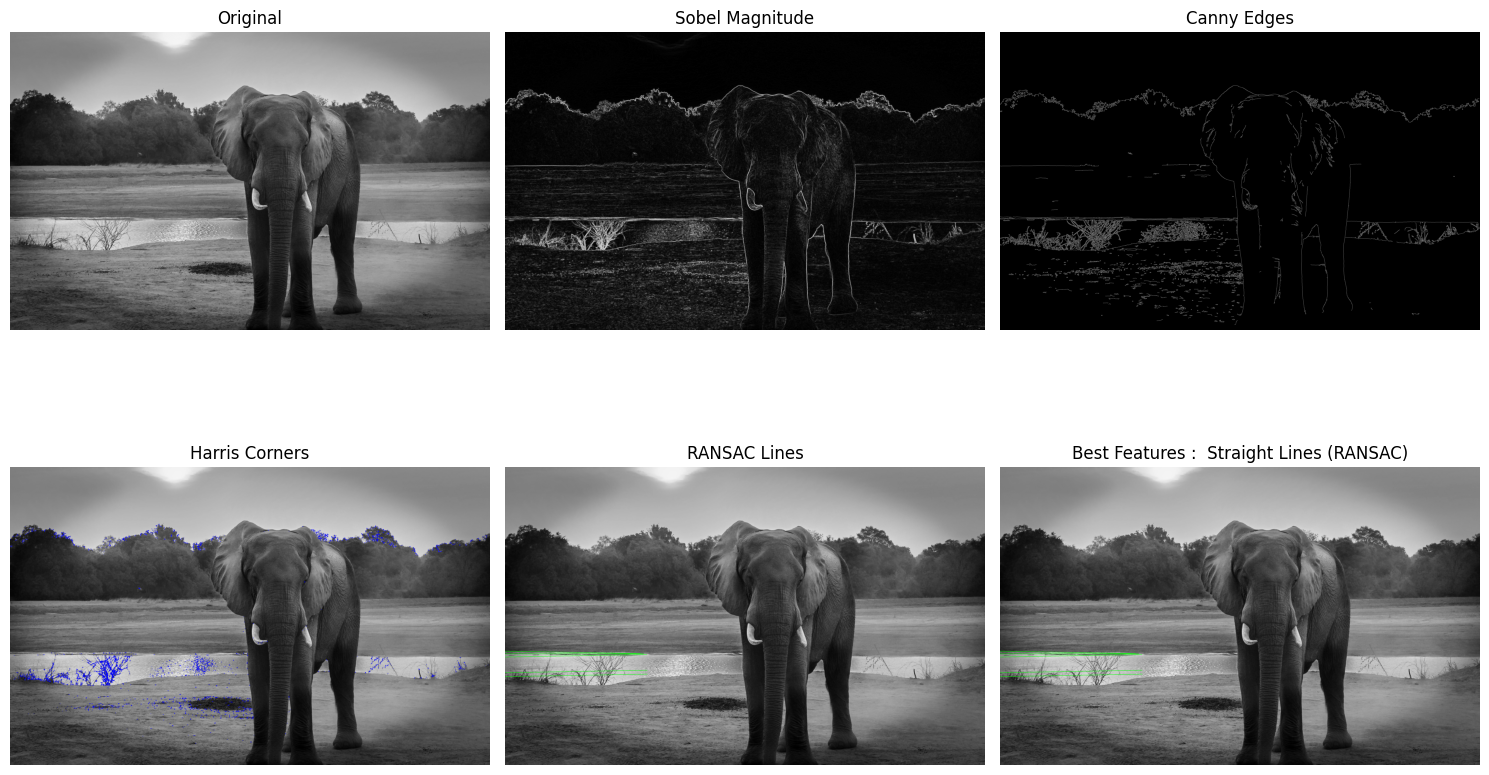

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_PATH = "/content/CV assignment_code.jpg"
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

# Step 1: Preprocessing
blur = cv2.GaussianBlur(img, (5, 5), 1.2)

# Step 2: Sobel + Canny
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = cv2.convertScaleAbs(cv2.magnitude(sobel_x, sobel_y))
edges = cv2.Canny(blur, 50, 150)

# Step 3: Harris Corners
harris = cv2.cornerHarris(np.float32(blur), 2, 3, 0.04)
harris = cv2.dilate(harris, None)
corners_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
corners_vis[harris > 0.01 * harris.max()] = [0, 0, 255]

# Step 4:(line detection check)
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)
line_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

num_lines = 0
if lines is not None:
    for i in range(min(5, len(lines))):
        rho, theta = lines[i][0]
        a = np.cos(theta); b = np.sin(theta)
        x0 = a * rho; y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        cv2.line(line_vis, pt1, pt2, (0, 255, 0), 2)
    num_lines = len(lines)

# Step 5: Decision for best feature set
if num_lines > 0:
    best_output = line_vis
    result_type = "Best Features :  Straight Lines (RANSAC)"
else:
    best_output = corners_vis
    result_type = "Best Features: Corners (Harris)"

print(result_type)

# Display
titles = [
    "Original", "Sobel Magnitude", "Canny Edges",
    "Harris Corners", "RANSAC Lines", result_type
]

images = [
    img, sobel_mag, edges,
    corners_vis, line_vis, best_output
]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray" if i != 3 and i != 4 and i != 5 else None)
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


Detected lines: 55, Corners: 163, Edge ratio: 0.180
Best Features → Lines (RANSAC)


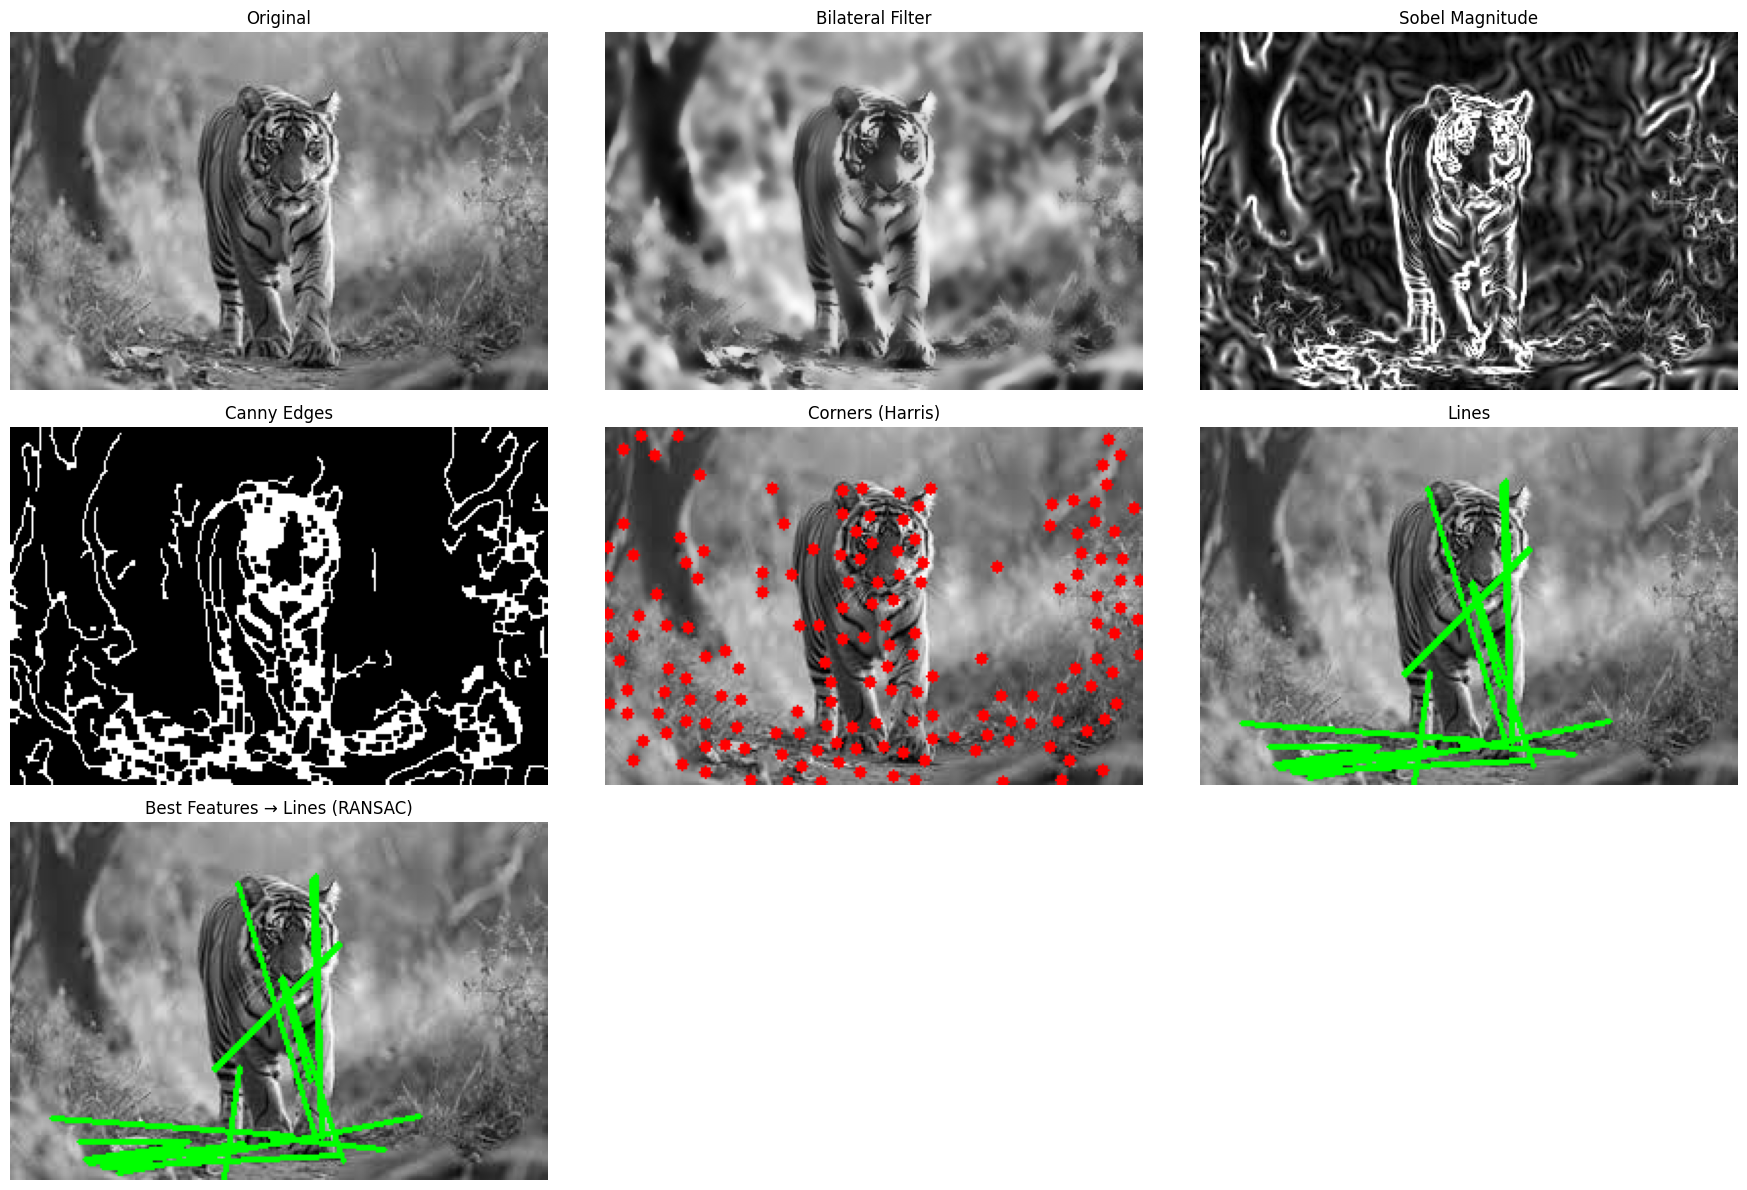

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_PATH = "/content/CV assignment_2.jpg"
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found! Check IMAGE_PATH")

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img)

blur = cv2.bilateralFilter(img_clahe, 9, 75, 75)
# Sobel
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = cv2.convertScaleAbs(cv2.magnitude(sobel_x, sobel_y))

median_val = np.median(blur)
lower = int(max(0, 0.66 * median_val))
upper = int(min(255, 1.33 * median_val))
edges = cv2.Canny(blur, lower, upper)

# Clean edges
kernel = np.ones((3,3), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Corner Detection (Harris)

harris = cv2.cornerHarris(np.float32(blur), 2, 3, 0.04)
harris = cv2.dilate(harris, None)
corners_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
corners_vis[harris > 0.01 * harris.max()] = [0, 0, 255]

gftt = cv2.goodFeaturesToTrack(blur, 300, 0.01, 10)
gftt_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
num_corners = 0
if gftt is not None:
    num_corners = len(gftt)
    for c in gftt:
        x, y = int(c[0][0]), int(c[0][1])
        cv2.circle(gftt_vis, (x,y), 3, (255,0,0), -1)
# Line detection (similar to RANSAC)

line_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
linesP = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50,
                         minLineLength=50, maxLineGap=10)

num_lines = 0
if linesP is not None:
    num_lines = len(linesP)
    for l in linesP[:15]:
        x1, y1, x2, y2 = l[0]
        cv2.line(line_vis, (x1,y1), (x2,y2), (0,255,0), 2)


edge_ratio = np.count_nonzero(edges) / edges.size

if num_lines > 5:
    best_output = line_vis
    best_name = "Best Features → Lines (RANSAC)"
elif num_corners > 200:
    best_output = gftt_vis
    best_name = "Best Features → Corners"
else:
    best_output = edges
    best_name = "Best Features → Edges (Canny)"

print(f"Detected lines: {num_lines}, Corners: {num_corners}, Edge ratio: {edge_ratio:.3f}")
print(best_name)

# Outputs

titles = [
    "Original", "Bilateral Filter",
    "Sobel Magnitude", "Canny Edges",
    "Corners (Harris)", "Lines",
    best_name
]

images = [
    img, blur,
    sobel_mag, edges,
    gftt_vis, line_vis,
    best_output
]

plt.figure(figsize=(18, 12))
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap="gray" if i in [0,1,2,3] else None)
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()